<a href="https://colab.research.google.com/github/MadhurimaDeb/Loan_Status_prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
import pandas as pd

# Prompt the user to upload the dataset file
uploaded = files.upload()

# Get the filename from the uploaded files
filename = next(iter(uploaded))




StopIteration: ignored

In [8]:
# Load the dataset into a DataFrame
df = pd.read_csv('loan_prediction.csv')
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
test = pd.read_csv('test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [11]:
df.shape

(614, 13)

In [12]:
train.shape

(614, 13)

In [13]:
test.shape

(367, 12)

In [14]:
## Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
### Check Null Values In The Dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df.isnull().sum()*100/ len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [18]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Select columns with less than 5% missing values
selected_columns = missing_percentage[missing_percentage < 5].index

# Drop rows containing missing values in selected columns
df = df.dropna(subset=selected_columns)

# Verify the result
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [19]:
df.isnull().sum()*100 / len(df)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [20]:
df['Self_Employed'].mode()[0]

'No'

In [21]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df.isnull().sum()*100 / len(df)

<ipython-input-21-e62757602e82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [22]:
df['Credit_History'] =df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df.isnull().sum()*100 / len(df)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    object 
 2   Married            553 non-null    object 
 3   Dependents         553 non-null    object 
 4   Education          553 non-null    object 
 5   Self_Employed      553 non-null    object 
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     553 non-null    float64
 11  Property_Area      553 non-null    object 
 12  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


In [24]:
df = df.drop('Loan_ID', axis=1)
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [25]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
df['Gender'].value_counts()

Male      449
Female    104
Name: Gender, dtype: int64

In [27]:
df['Married'].value_counts()

Yes    359
No     194
Name: Married, dtype: int64

In [28]:
df['Dependents'].value_counts()

0     316
1      96
2      96
3+     45
Name: Dependents, dtype: int64

In [29]:
df['Education'].value_counts()

Graduate        437
Not Graduate    116
Name: Education, dtype: int64

In [30]:
df['Self_Employed'].value_counts()

No     481
Yes     72
Name: Self_Employed, dtype: int64

In [31]:
df['Loan_Status'].value_counts()

Y    389
N    164
Name: Loan_Status, dtype: int64

In [32]:
df['Property_Area'].value_counts()

Semiurban    215
Urban        175
Rural        163
Name: Property_Area, dtype: int64

In [33]:
df['Dependents'] =df['Dependents'].replace(to_replace="3+",value='4')

In [34]:
df['Married'] = df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0}).astype('int')
df['Dependents'] = df['Dependents'].astype(int)

In [35]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [37]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}).astype('int')

In [38]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0


In [39]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Exploratory Data Analysis

In [40]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)


           Gender     Married  Dependents   Education  Self_Employed  \
count  553.000000  553.000000  553.000000  553.000000     553.000000   
mean     0.811935    0.649186    0.846293    0.790235       0.130199   
std      0.391118    0.477657    1.206816    0.407509       0.336827   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    1.000000       0.000000   
50%      1.000000    1.000000    0.000000    1.000000       0.000000   
75%      1.000000    1.000000    2.000000    1.000000       0.000000   
max      1.000000    1.000000    4.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       553.000000         553.000000  553.000000        553.000000   
mean       5350.018083        1659.119204  146.001808        341.663653   
std        5965.429068        3043.448229   84.052035         65.555451   
min         150.000000           0.000000    9.0000

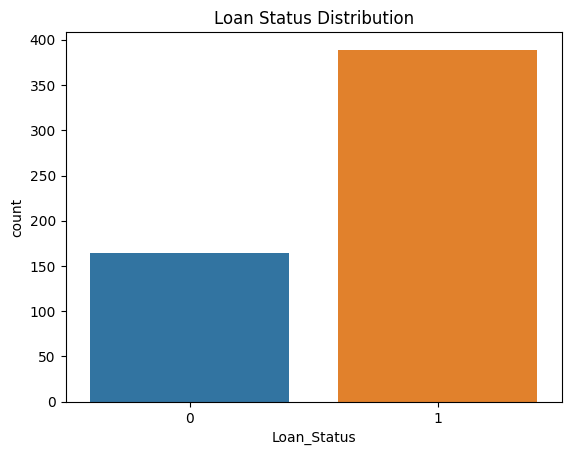

In [41]:
# Distribution of target variable
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()



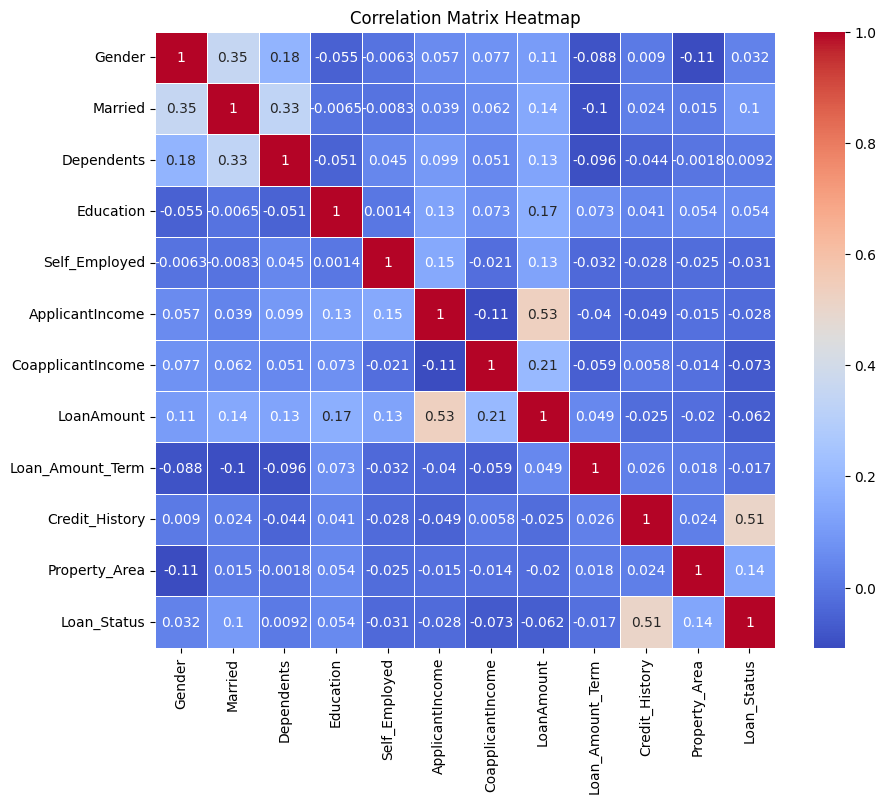

In [42]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



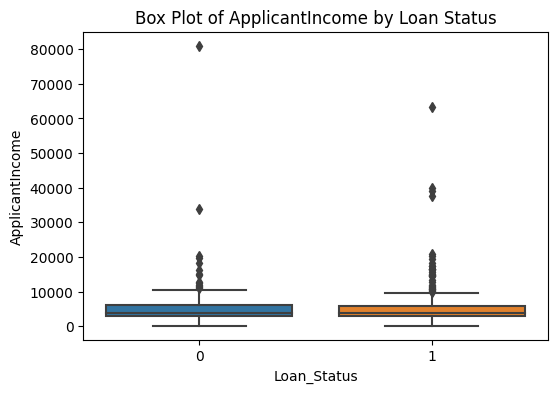

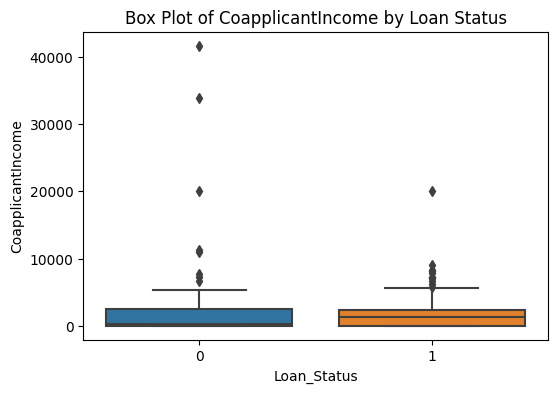

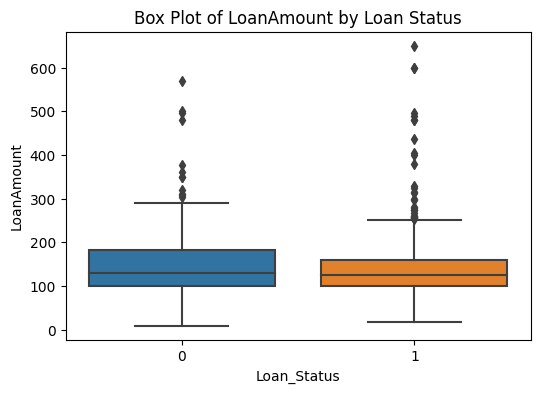

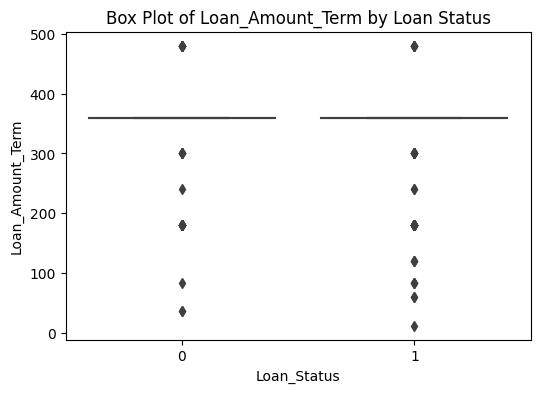

In [43]:
# Box plot for numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Loan_Status', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Loan Status')
    plt.show()



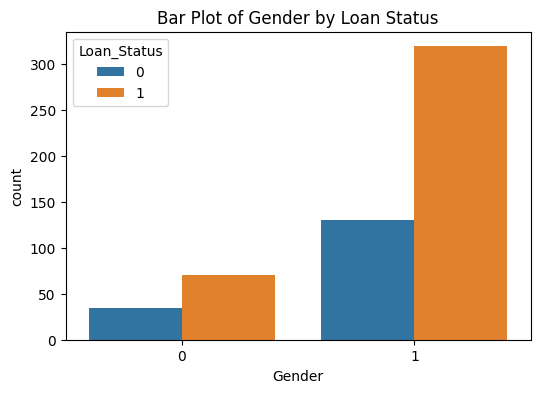

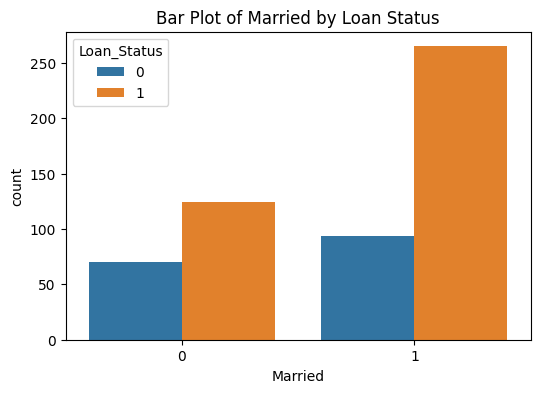

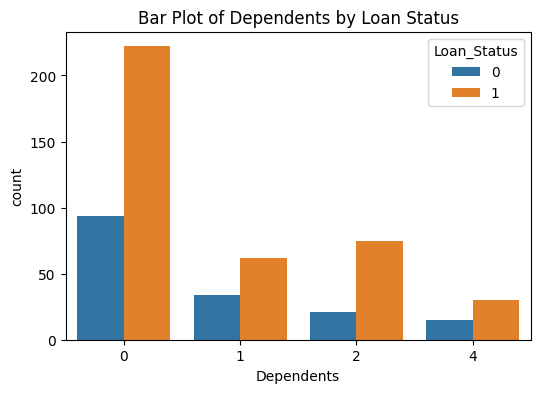

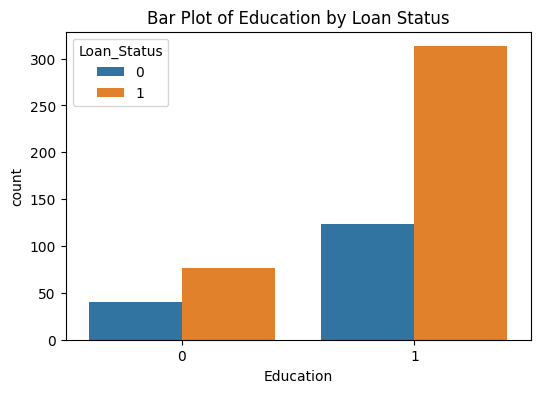

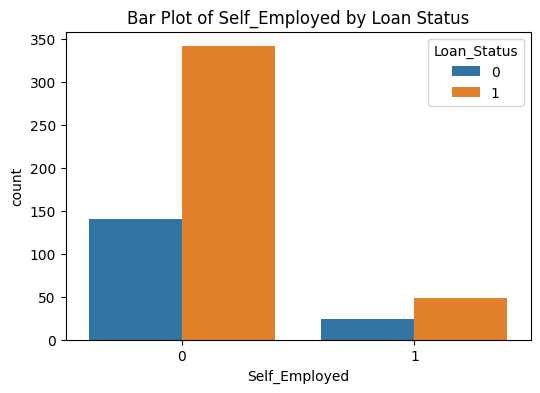

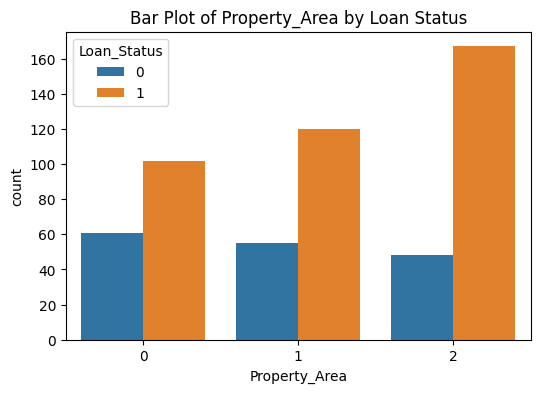

In [44]:
# Bar plot for categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='Loan_Status', data=df)
    plt.title(f'Bar Plot of {feature} by Loan Status')
    plt.show()

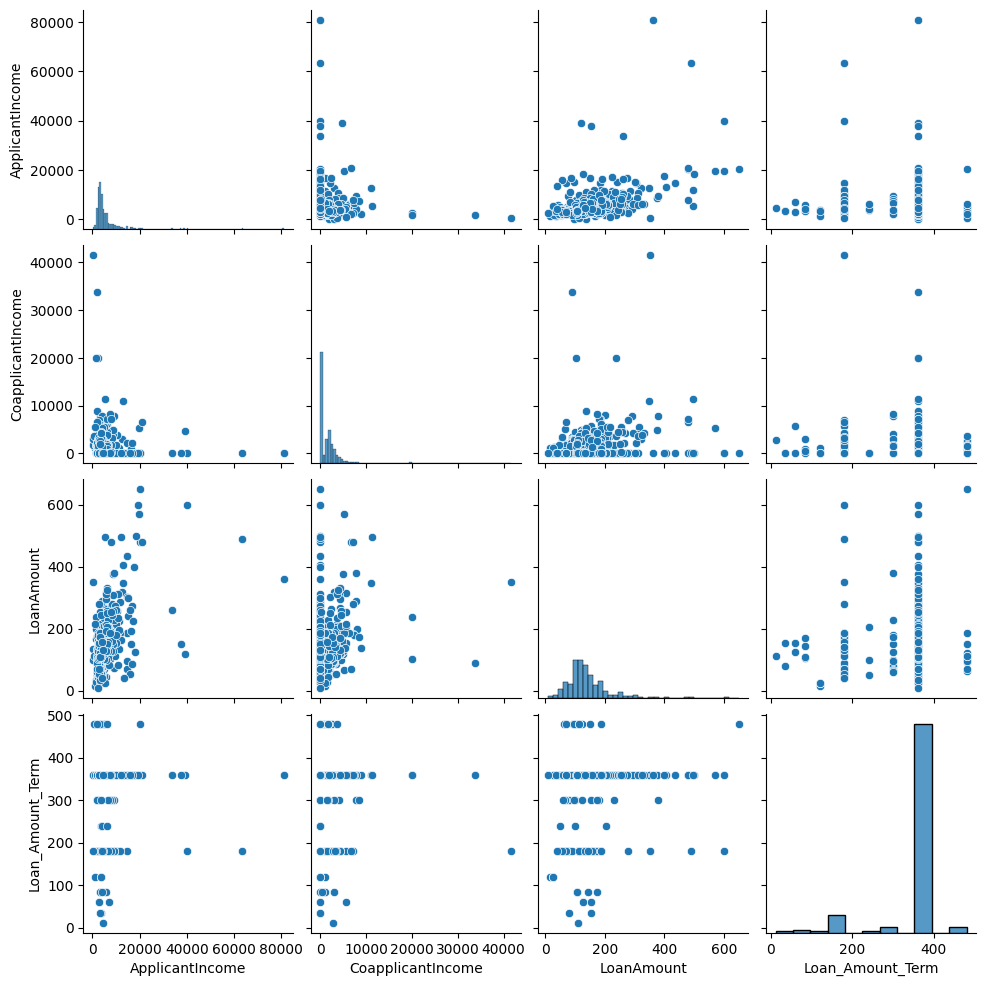

In [45]:
# Selecting only the numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Creating pairplots for all combinations of numerical features
sns.pairplot(data=df[numerical_features])
plt.show()

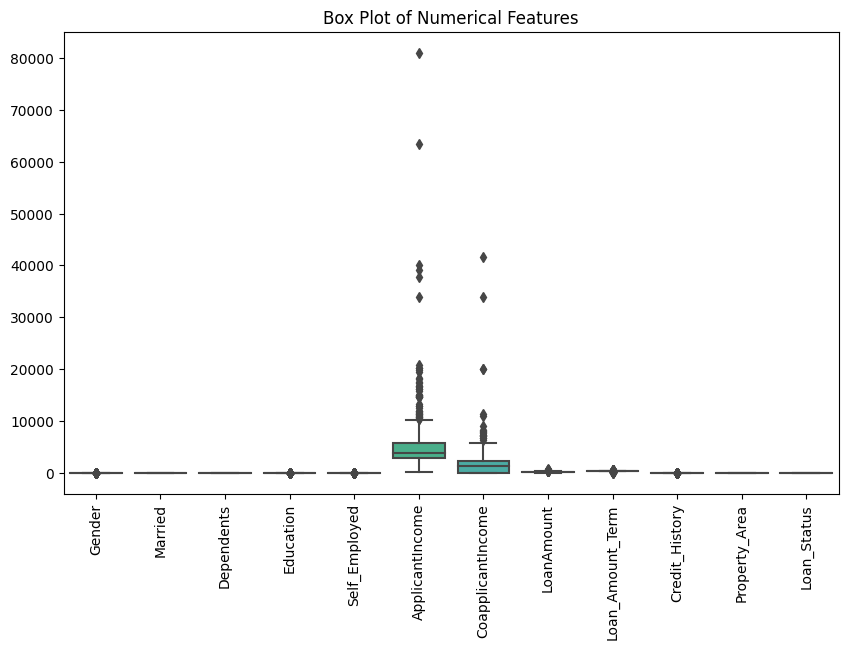

In [46]:
# Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation = 90)
plt.show()


Outliers from all Columns


In [47]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers by comparing values with the threshold
outliers = df[((df < Q1 - threshold * IQR) | (df > Q3 + threshold * IQR)).any(axis=1)]

# Print the outliers for each column
for column in outliers.columns:
    print(f"Outliers in '{column}':")
    print(outliers[column])
    print()


Outliers in 'Gender':
2      1
3      1
5      1
6      1
7      1
      ..
604    0
607    1
609    0
610    1
613    0
Name: Gender, Length: 347, dtype: int64

Outliers in 'Married':
2      1
3      1
5      1
6      1
7      1
      ..
604    1
607    1
609    0
610    1
613    0
Name: Married, Length: 347, dtype: int64

Outliers in 'Dependents':
2      0
3      0
5      2
6      0
7      4
      ..
604    1
607    2
609    0
610    4
613    0
Name: Dependents, Length: 347, dtype: int64

Outliers in 'Education':
2      1
3      0
5      1
6      0
7      1
      ..
604    1
607    0
609    1
610    1
613    1
Name: Education, Length: 347, dtype: int64

Outliers in 'Self_Employed':
2      1
3      0
5      1
6      0
7      0
      ..
604    0
607    0
609    0
610    0
613    1
Name: Self_Employed, Length: 347, dtype: int64

Outliers in 'ApplicantIncome':
2       3000
3       2583
5       5417
6       2333
7       3036
       ...  
604    12000
607     3987
609     2900
610     4106

In [48]:
# Get the column names with any outliers
columns_with_outliers = outliers.any()[outliers.any()].index

# Print the column names
print("Column names with outliers:")
for column in columns_with_outliers:
    print(column)

Column names with outliers:
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [49]:
# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Print the count of outliers from each column
print("Outlier counts from each column:")
print(outlier_counts)

Outlier counts from each column:
Gender               2.430000e+02
Married              2.040000e+02
Dependents           3.040000e+02
Education            2.310000e+02
Self_Employed        7.200000e+01
ApplicantIncome      2.095479e+06
CoapplicantIncome    5.913288e+05
LoanAmount           5.244800e+04
Loan_Amount_Term     1.147800e+05
Credit_History       2.760000e+02
Property_Area        3.740000e+02
Loan_Status          2.170000e+02
dtype: float64


In [50]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers by comparing values with the threshold
outliers = ((df < Q1 - threshold * IQR) | (df > Q3 + threshold * IQR))

# Replace outliers with the median value
df_replaced = df.copy()
for column in df.columns:
    column_median = df[column].median()
    df_replaced[column] = np.where(outliers[column], column_median, df[column])

# Print the modified DataFrame with replaced outliers
print(df_replaced)


     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1.0      1.0         1.0        1.0            0.0           4583.0   
2       1.0      1.0         0.0        1.0            0.0           3000.0   
3       1.0      1.0         0.0        1.0            0.0           2583.0   
4       1.0      0.0         0.0        1.0            0.0           6000.0   
5       1.0      1.0         2.0        1.0            0.0           5417.0   
..      ...      ...         ...        ...            ...              ...   
609     1.0      0.0         0.0        1.0            0.0           2900.0   
610     1.0      1.0         4.0        1.0            0.0           4106.0   
611     1.0      1.0         1.0        1.0            0.0           8072.0   
612     1.0      1.0         2.0        1.0            0.0           7583.0   
613     1.0      0.0         0.0        1.0            0.0           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [51]:
# Calculate the IQR for each column
Q1 = df_replaced.quantile(0.25)
Q3 = df_replaced.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers by comparing values with the threshold
outliers = ((df_replaced < Q1 - threshold * IQR) | (df_replaced > Q3 + threshold * IQR))

# Count the number of outliers in each column
outlier_counts = outliers.sum(axis=0)

# Print the columns with their total number of outliers
print("Columns with their total number of outliers:")
for column, count in outlier_counts.iteritems():
    print(f"{column}: {count}")


Columns with their total number of outliers:
Gender: 0
Married: 0
Dependents: 0
Education: 0
Self_Employed: 0
ApplicantIncome: 34
CoapplicantIncome: 7
LoanAmount: 25
Loan_Amount_Term: 0
Credit_History: 0
Property_Area: 0
Loan_Status: 0


<ipython-input-51-f16773a7fed3>:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in outlier_counts.iteritems():


In [52]:
from scipy.stats.mstats import winsorize

# Define the threshold for winsorization (e.g., 5% on each tail)
winsorize_threshold = 0.05

# Apply winsorization to handle outliers
df_winsorized = df_replaced.copy()
df_winsorized['ApplicantIncome'] = winsorize(df_replaced['ApplicantIncome'], limits=[winsorize_threshold, winsorize_threshold])
df_winsorized['CoapplicantIncome'] = winsorize(df_replaced['CoapplicantIncome'], limits=[winsorize_threshold, winsorize_threshold])
df_winsorized['LoanAmount'] = winsorize(df_replaced['LoanAmount'], limits=[winsorize_threshold, winsorize_threshold])

# Calculate the IQR for each column
Q1 = df_winsorized.quantile(0.25)
Q3 = df_winsorized.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers by comparing values with the threshold
outliers = ((df_winsorized < Q1 - threshold * IQR) | (df_winsorized > Q3 + threshold * IQR))

# Count the number of outliers in each column
outlier_counts = outliers.sum(axis=0)

# Print the columns with their total number of outliers
print("Columns with their total number of outliers:")
for column, count in outlier_counts.iteritems():
    print(f"{column}: {count}")


Columns with their total number of outliers:
Gender: 0
Married: 0
Dependents: 0
Education: 0
Self_Employed: 0
ApplicantIncome: 34
CoapplicantIncome: 0
LoanAmount: 0
Loan_Amount_Term: 0
Credit_History: 0
Property_Area: 0
Loan_Status: 0


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
<ipython-input-52-a0d0ef2be31f>:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in outlier_counts.iteritems():


In [53]:
# Apply logarithmic transformation to handle outliers in 'ApplicantIncome'
df_transformed = df_winsorized.copy()
df_transformed['ApplicantIncome'] = np.log1p(df_winsorized['ApplicantIncome'])

# Calculate the IQR for each column
Q1 = df_transformed.quantile(0.25)
Q3 = df_transformed.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers by comparing values with the threshold
outliers = ((df_transformed < Q1 - threshold * IQR) | (df_transformed > Q3 + threshold * IQR))

# Count the number of outliers in each column
outlier_counts = outliers.sum(axis=0)

# Print the columns with their total number of outliers
print("Columns with their total number of outliers:")
for column, count in outlier_counts.iteritems():
    print(f"{column}: {count}")


Columns with their total number of outliers:
Gender: 0
Married: 0
Dependents: 0
Education: 0
Self_Employed: 0
ApplicantIncome: 0
CoapplicantIncome: 0
LoanAmount: 0
Loan_Amount_Term: 0
Credit_History: 0
Property_Area: 0
Loan_Status: 0


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
<ipython-input-53-bb9910a20458>:21: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in outlier_counts.iteritems():


**Outliers were detected and handled using tecgniques: IQR method, Winsorized method and Logarithmic tranformations.**

In [54]:
# Convert df_transformed back to df
df.update(df_transformed)

# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers by comparing values with the threshold
outliers = ((df < Q1 - threshold * IQR) | (df > Q3 + threshold * IQR))

# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Print the columns with their total number of outliers
print("Columns with their total number of outliers:")
for column, count in outlier_counts.iteritems():
    print(f"{column}: {count}")


Columns with their total number of outliers:
Gender: 0
Married: 0
Dependents: 0
Education: 0
Self_Employed: 0
ApplicantIncome: 0
CoapplicantIncome: 0
LoanAmount: 0
Loan_Amount_Term: 0
Credit_History: 0
Property_Area: 0
Loan_Status: 0


<ipython-input-54-95876cabf8d1>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in outlier_counts.iteritems():


In [55]:
df.shape

(553, 12)

Train test split

In [56]:
from sklearn.model_selection import cross_val_score

# Separate features and target variable
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)
logreg = LogisticRegression()
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", logreg_scores)
print("Logistic Regression Average Accuracy:", logreg_scores.mean())


Logistic Regression Accuracy: 0.6666666666666666
Logistic Regression Cross-Validation Scores: [0.71910112 0.68539326 0.70454545 0.68181818 0.69318182]
Logistic Regression Average Accuracy: 0.6968079673135853


In [67]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
svm = SVC()
svm_scores = cross_val_score(svm, X_train, y_train, cv=5)
print("SVM Cross-Validation Scores:", svm_scores)
print("SVM Average Accuracy:", svm_scores.mean())


SVM Accuracy: 0.6936936936936937
SVM Cross-Validation Scores: [0.70786517 0.70786517 0.70454545 0.70454545 0.70454545]
SVM Average Accuracy: 0.7058733401430031


In [68]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
dt_classifier = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Decision Tree Average Accuracy:", dt_scores.mean())



Decision Tree Accuracy: 0.5765765765765766
Decision Tree Cross-Validation Scores: [0.4494382  0.61797753 0.63636364 0.55681818 0.64772727]
Decision Tree Average Accuracy: 0.5816649642492339


In [69]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
rf_classifier = RandomForestClassifier()
rf_scores = cross_val_score(rf_classifier,X_train, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Average Accuracy:", rf_scores.mean())


Random Forest Accuracy: 0.6396396396396397
Random Forest Cross-Validation Scores: [0.66292135 0.65168539 0.68181818 0.70454545 0.68181818]
Random Forest Average Accuracy: 0.6765577119509703


In [70]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)
gb_classifier = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_classifier, X_train, y_train, cv=5)
print("Gradient Boosting Cross-Validation Scores:", gb_scores)
print("Gradient Boosting Average Accuracy:", gb_scores.mean())

Gradient Boosting Accuracy: 0.6126126126126126
Gradient Boosting Cross-Validation Scores: [0.57303371 0.65168539 0.65909091 0.61363636 0.68181818]
Gradient Boosting Average Accuracy: 0.63585291113381


HYPER PARAMETER TUNING

In [62]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [85]:
# Logistic Regression hyperparameter tuning
logreg = LogisticRegression()
logreg_params = {'C': [0.1, 1, 10]}
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)
logreg_best_score = logreg_grid.best_score_
print("Logistic Regression Best Parameters:", logreg_grid.best_params_)
print("Logistic Regression Best Score:", logreg_best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Best Parameters: {'C': 0.1}
Logistic Regression Best Score: 0.7013534218590399


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
# Random Forest Classifier hyperparameter tuning
rf_classifier = RandomForestClassifier()
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Best Score:", rf_grid.best_score_)



Random Forest Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Random Forest Best Score: 0.6968079673135853


In [74]:
# Decision Tree Classifier hyperparameter tuning
dt_classifier = DecisionTreeClassifier()
dt_params = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_classifier, dt_params, cv=5)
dt_grid.fit(X_train, y_train)
print("Decision Tree Best Parameters:", dt_grid.best_params_)
print("Decision Tree Best Score:", dt_grid.best_score_)



Decision Tree Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
Decision Tree Best Score: 0.662870275791624


In [75]:
# Gradient Boosting Classifier hyperparameter tuning
gb_classifier = GradientBoostingClassifier()
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}
gb_grid = GridSearchCV(gb_classifier, gb_params, cv=5)
gb_grid.fit(X, y)
print("Gradient Boosting Best Parameters:", gb_grid.best_params_)
print("Gradient Boosting Best Score:", gb_grid.best_score_)

Gradient Boosting Best Parameters: {'learning_rate': 0.001, 'n_estimators': 100}
Gradient Boosting Best Score: 0.7058733401430031


In [77]:
# SVM hyperparameter tuning
svm = SVC()
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X, y)
print("SVM Best Parameters:", svm_grid.best_params_)
print("SVM Best Score:", svm_grid.best_score_)

SVM Best Parameters: {'C': 0.1, 'kernel': 'linear'}
SVM Best Score: 0.7034398034398034


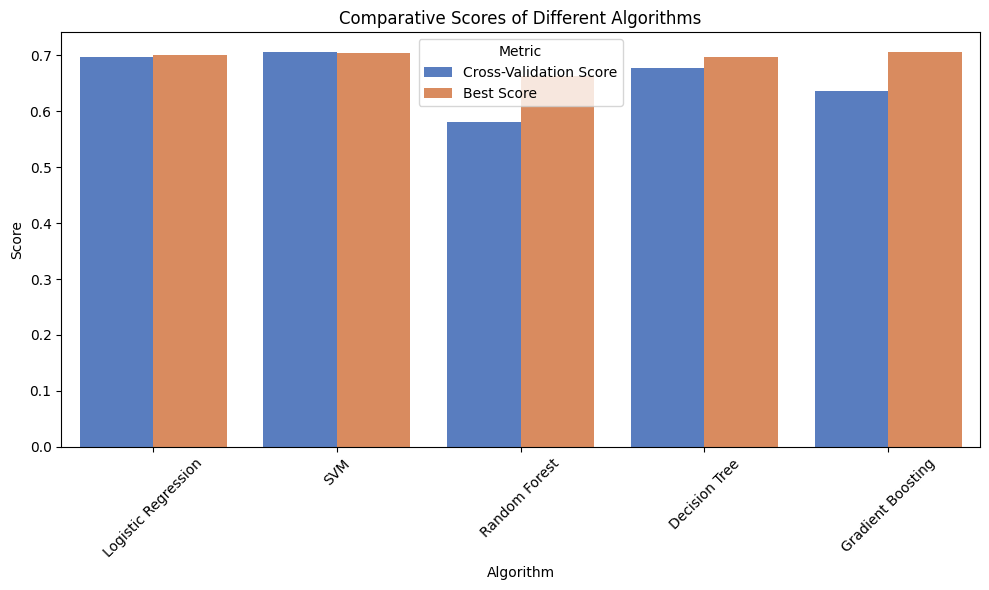

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-validation scores of each algorithm
cross_val_scores = [logreg_scores.mean() , svm_scores.mean(), dt_scores.mean(), rf_scores.mean(), gb_scores.mean()]

# Best scores of each algorithm
best_scores = [logreg_grid.best_score_, svm_grid.best_score_, dt_grid.best_score_, rf_grid.best_score_, gb_grid.best_score_]

# Algorithm names
algorithms = ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

# Creating a DataFrame for the scores
scores_df = pd.DataFrame({'Algorithm': algorithms,
                          'Cross-Validation Score': cross_val_scores,
                          'Best Score': best_scores})

# Reshaping the DataFrame for plotting with Seaborn
scores_df_melted = scores_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

# Plotting the comparative graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Score', hue='Metric', data=scores_df_melted, palette='muted')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Comparative Scores of Different Algorithms')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [89]:
# Create a list of tuples containing algorithm name, cross-validation score, and best score
results = [('Logistic Regression', logreg_scores.mean(), logreg_grid.best_score_),
           ('SVM',  svm_scores.mean(), svm_grid.best_score_),
           ('Random Forest', rf_scores.mean(), rf_grid.best_score_),
           ('Decision Tree', dt_scores.mean(), dt_grid.best_score_),
           ('Gradient Boosting', gb_scores.mean(), gb_grid.best_score_)]

# Find the highest best score
highest_best_score = max(results, key=lambda x: x[2])[2]

# Filter the algorithms with the highest best score
highest_best_score_algorithms = [result for result in results if result[2] == highest_best_score]

# If there are multiple algorithms with the highest best score, find the one with the highest difference
if len(highest_best_score_algorithms) > 1:
    highest_difference = max(highest_best_score_algorithms, key=lambda x: x[1] - x[2])
    highest_algorithm = highest_difference[0]
else:
    highest_algorithm = highest_best_score_algorithms[0][0]

# Print the highest algorithm with the highest best score or highest difference
print("Algorithm with the highest best score or highest difference:")
print("Algorithm:", highest_algorithm)
print("Best Score:", highest_best_score)


Algorithm with the highest best score or highest difference:
Algorithm: Gradient Boosting
Best Score: 0.7058733401430031


SAVING THE MODEL

In [ ]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [ ]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [ ]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

In [90]:
from joblib import dump

# Create and train the Gradient Boosting Classifier model (replace with your selected hyperparameters)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model on the data
gb_model.fit(X, y)

# Save the model to a file
loan_status_prediction = 'gb_model.joblib'
dump(gb_model, loan_status_prediction)

print("Model saved successfully as", loan_status_prediction)


Model saved successfully as gb_model.joblib


In [102]:
from joblib import load

# Load the saved model from file
loaded_model = load(loan_status_prediction)

# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)


In [108]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
predictions = loaded_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)


Accuracy: 0.9009009009009009


In [130]:
from joblib import load

# Load the saved model
loaded_model = load('gb_model.joblib')

# Make predictions on new data
new_data = [[1.0,1.0,2.0,1.0,0.0,7.539559,1213.0,225.0,360.0,1.0,1.0]]  # Your new data for prediction
predictions = loaded_model.predict(new_data)

# Print the predictions
print("Predictions:", predictions)


Predictions: [0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
